## Jonathan Perkins
## PH 418
## Homework 4
## 3/21/2024

# Classification of Handwritten Digits

# MNIST database

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits. It is widely used for training and testing in machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

**Note:** Do not confuse the MNIST databse with the sklearn.datasets.load_digits, which contains only 1797 samples of 8x8 images.

# Imports

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray, rgba2rgb

# Downloading the databse

Fetch dataset from openml (https://openml.org/) by name or dataset id. Datasets are uniquely identified by either an integer ID, or by a combination of name and version. In case a name is given, a version can also be provided.

**Note:** The MINST database is about 1.4 GB, and may take minutes to download. It is suggested that you save the features and target values after the data are downloaded. 

In [2]:
#Download and save the files:
t1=time.time()

X, y = fetch_openml('mnist_784', return_X_y = True)

# X, y are respectively Pandas Dataframe and Series objects.
# X contains numerical values, while y contains strings.
# Always check their types and contents first!

X = X.to_numpy()
y = y.to_numpy()
y = y.astype(int)

np.savetxt('MNIST_X.dat', X)
np.savetxt('MNIST_y.dat',y)

t2=time.time()
print('Time for downloading/saving the MNIST dataset (secs):', t2-t1)

Time for downloading/saving the MNIST dataset (secs): 31.400216102600098


In [200]:
#Load the files:
t1=time.time()

X = np.loadtxt('4_MNIST_X.dat')
y = np.loadtxt('4_MNIST_y.dat')
y=y.astype(int)

t2=time.time()
print('Time for loading the MNIST dataset (secs):', t2-t1)

Time for loading the MNIST dataset (secs): 6.8869240283966064


In [201]:
print(X.shape, '\n', y.shape, '\n')
print(y[0:10])

(70000, 784) 
 (70000,) 

[5 0 4 1 9 2 1 3 1 4]


# Visualizing the images

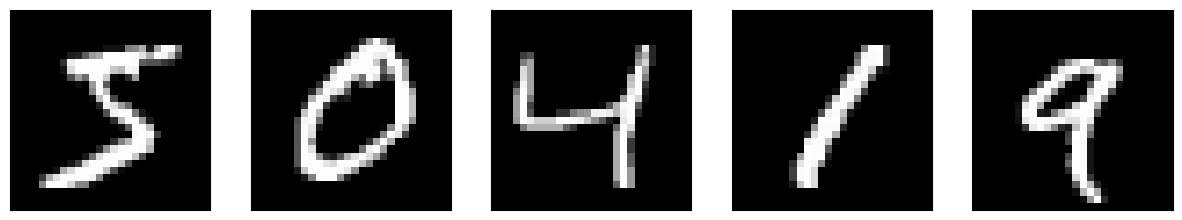

In [8]:
#Plot the training images:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3),\
                         subplot_kw={'xticks':(), 'yticks': ()})

#Note about the reshape method!
for i in range(5):
    ax=axes[i]
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')    

# a) Train-test split

In [10]:
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
# Note: test_size and train_size is between 0.0 to 1.0.
# If None is specified, test_size = 0.25 and train_size = 1- test_size = 0.75.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, shuffle = True)

print('X training data shape: ', X_train.shape, '\n', 'X test data shape: ', X_test.shape, '\n')
print('y training data shape: ', y_train.shape, '\n', 'y test data shape: ', y_test.shape)

X training data shape:  (63000, 784) 
 X test data shape:  (7000, 784) 

y training data shape:  (63000,) 
 y test data shape:  (7000,)


# b) Random forest

In [13]:
# Consider a random forest of 5 trees (set by the parameter n_estimators):
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
# Scores
train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)

print("Training score: ", train_score, '\n')
print("Test score: ", test_score, '\n')

Training score:  1.0 

Test score:  0.9715714285714285 



In [197]:
scores = cross_val_score(forest, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

Cross validation scores:  [0.96547619 0.96730159 0.96873016 0.9681746  0.97063492]


In [19]:
print("Score list: ", scores, '\n')
avg_score = sum(scores)/len(scores)
print("Average score value: ", avg_score)

Score list:  [0.96547619 0.96730159 0.96873016 0.9681746  0.97063492] 

Average score value:  0.9680634920634921


# c) Changing hyperparameters

In [20]:
X_red, X_other, y_red, y_other = train_test_split(X, y, test_size = 0.9, random_state = 0, shuffle = True)

print('X reduced data shape: ', X_red.shape, '\n', 'X other data shape: ', X_other.shape, '\n')
print('y reduced data shape: ', y_red.shape, '\n', 'y other data shape: ', y_other.shape)

X reduced data shape:  (7000, 784) 
 X other data shape:  (63000, 784) 

y reduced data shape:  (7000,) 
 y other data shape:  (63000,)


In [24]:
max_depth = {"max_depth": [1,2,3,4,5,6,7,8,9,10]}
criterion = {"criterion": ["gini", "entropy"]}
min_samples_split = {"min_samples_split": [2,3,4,5]}
min_samples_leaf = {"min_samples_leaf": [1,2,3,4,5]}

forest2 = RandomForestClassifier(random_state=0)
forest2 = GridSearchCV(forest2, [max_depth, criterion, min_samples_split, min_samples_leaf], cv=5)
forest2.fit(X_red, y_red)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'criterion': ['gini', 'entropy']},
                         {'min_samples_split': [2, 3, 4, 5]},
                         {'min_samples_leaf': [1, 2, 3, 4, 5]}])

In [171]:
cv_df = pd.DataFrame(forest2.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_criterion,param_min_samples_split,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.365764,0.019959,0.008539,0.000659,1,NaN,NaN,NaN,{'max_depth': 1},0.567143,0.552857,0.558571,0.557143,0.575714,0.562286,0.008162,21
1,0.566253,0.005292,0.010136,0.000164,2,NaN,NaN,NaN,{'max_depth': 2},0.660714,0.629286,0.667143,0.657143,0.667143,0.656286,0.014036,20
2,0.786576,0.006634,0.011796,0.000233,3,NaN,NaN,NaN,{'max_depth': 3},0.764286,0.740000,0.760000,0.764286,0.754286,0.756571,0.009062,19
3,1.028834,0.047319,0.013447,0.000099,4,NaN,NaN,NaN,{'max_depth': 4},0.820000,0.825000,0.812143,0.817857,0.810714,0.817143,0.005229,18
4,1.232168,0.005499,0.015311,0.000258,5,NaN,NaN,NaN,{'max_depth': 5},0.866429,0.848571,0.861429,0.857857,0.869286,0.860714,0.007242,17
5,1.453376,0.010609,0.016920,0.000241,6,NaN,NaN,NaN,{'max_depth': 6},0.902143,0.883571,0.884286,0.892143,0.896429,0.891714,0.007108,16
6,1.662198,0.012309,0.018835,0.000076,7,NaN,NaN,NaN,{'max_depth': 7},0.920714,0.905714,0.906429,0.902857,0.902143,0.907571,0.006770,15
7,1.848910,0.012272,0.019883,0.000436,8,NaN,NaN,NaN,{'max_depth': 8},0.930000,0.916429,0.915714,0.910000,0.927857,0.920000,0.007653,14
8,2.040297,0.007769,0.021753,0.000220,9,NaN,NaN,NaN,{'max_depth': 9},0.935000,0.928571,0.929286,0.919286,0.932143,0.928857,0.005299,13
9,2.200488,0.008038,0.023360,0.000206,10,NaN,NaN,NaN,{'max_depth': 10},0.942857,0.926429,0.934286,0.922857,0.941429,0.933571,0.007928,11


In [174]:
print("Best estimator: ", forest2.best_estimator_, '\n')
print("Best score: ", forest2.best_score_, '\n')
print("Best overall parameter: ", forest2.best_params_, '\n')
print("Best index: ", forest2.best_index_, '\n', '\n')

print("Best max_depth: 10", '\n')
print("Best criterion: 'gini'", '\n')
print("Best min_samples_split: 2", '\n')
print("best min_samples_leaf: 1")

Best estimator:  RandomForestClassifier(random_state=0) 

Best score:  0.945 

Best overall parameter:  {'criterion': 'gini'} 

Best index:  10 
 

Best max_depth: 10 

Best criterion: 'gini' 

Best min_samples_split: 2 

best min_samples_leaf: 1


In [175]:
#cv_df.loc[cv_df.groupby('params')['mean_test_score'].idxmax()]

# d) Random forest with best hyperparameters

In [180]:
forest3 = RandomForestClassifier(random_state=0, max_depth=10, criterion='gini', min_samples_split=2, min_samples_leaf=1)
forest3.fit(X_red, y_red)

RandomForestClassifier(max_depth=10, random_state=0)

## Preprocessing my own handwritten digits

In [158]:
my_digits = io.imread_collection('my_numbers/*.png')
my_digits = list(my_digits)

In [159]:
for i in range(len(my_digits)): # Resizing each image
    my_digits[i] = resize(my_digits[i], (28, 28))
    my_digits[i] = rgb2gray(rgba2rgb(my_digits[i]))

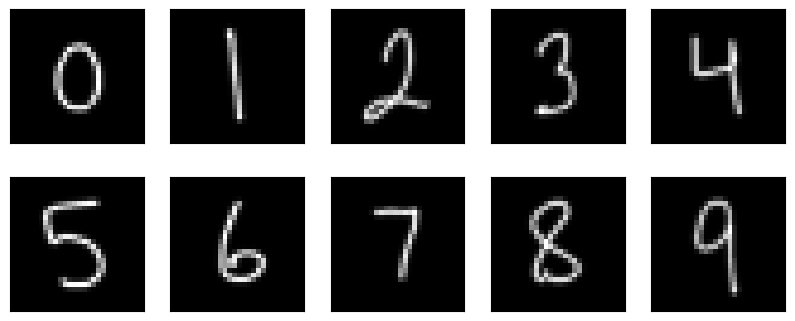

In [167]:
rows = 2
columns = 5
fig, axes = plt.subplots(rows, columns, figsize=(columns*2,rows*2))

for i in range(rows):
    for j in range(columns):
        if i == 1:
            axes[i, j].imshow(my_digits[5+j], cmap='gray')
        else:
            axes[i, j].imshow(my_digits[j], cmap='gray')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_xticklabels([])
        axes[i, j].set_yticklabels([])

## Testing the model on my own handwritten digits

In [188]:
X_mine = np.array(my_digits).reshape(10,784)
y_mine = np.array([0,1,2,3,4,5,6,7,8,9])

In [199]:
print("Handwritten digits array shape: ", X_mine.shape, '\n', "y shape", y_mine.shape, '\n')
print("y labels: ", y_mine[0:10])

Handwritten digits array shape:  (10, 784) 
 y shape (10,) 

y labels:  [0 1 2 3 4 5 6 7 8 9]


In [190]:
train_score3 = forest3.score(X_red, y_red)
test_score3 = forest3.score(X_mine, y_mine)

print("Training score: ", train_score3, '\n')
print("Test score: ", test_score3, '\n')

scores3 = cross_val_score(forest3, X_red, y_red, cv=5)

print("Score list: ", scores3, '\n')
avg_score3 = sum(scores3)/len(scores3)
print("Average score value: ", avg_score3)

Training score:  0.9924285714285714 

Test score:  0.2 

Score list:  [0.94285714 0.92642857 0.93428571 0.92285714 0.94142857] 

Average score value:  0.9335714285714285
